In [ ]:
# !conda install pandas
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
# from array import array

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.layers.noise import GaussianDropout

In [2]:
# input image dimensions
img_rows, img_cols = 128, 128
# number of channels
img_channels = 3

# data
path1 = 'C:/Users/Java/Desktop/Project/Project_Image/data11/train'    
#path of folder of images    
path2 = 'C:/Users/Java/Desktop/Project/Project_Image/data11/train_set'  
#path of folder to save images    

listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)

for file in listing:
    im = Image.open(path1 + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('RGBA')
                #need to do some more processing here           
#     img.save(path2 +'/' +  file, "JPEG")
    gray.save(path2 +'\\' +  file, "JPEG")

imlist = os.listdir(path2)
im1 = array(Image.open(path2 + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ '/' +im2)).flatten()
              for im2 in imlist],'f')
                

label=np.ones((num_samples,),dtype = int)
# np.ones(shape[, dtype, order])
# 依据给定形状和类型(shape[, dtype, order])返回一个新的元素全部为1的数组

label[0:114]=0  # 二條城
label[114:1233]=1  # 三十三間堂
label[1233:3789]=2  # 千本鳥居
label[3789:5639]=3  # 平等院鳳凰堂 
label[5639:5928]=4  # 京都御所
label[5928:7857]=5  # 京都塔
label[7857:9809]=6  # 金閣寺
label[9809:10294]=7  # 清水寺
label[10294:11392]=8  # 渡月橋


# 0 二條城1-100		1-746
# 1 三十三間堂101-200	747-1796
# 2 千本鳥居201-300	1797-4228
# 3 平等院鳳凰堂301-400	4229-6120
# 4 京都御所401-500	6121-6468
# 5 京都塔501-600		6469-7959
# 6 金格寺601-700		7960-10028
# 7 清水寺701-800		10029-10411
# 8 渡月橋801-900		10412-11872

data,Label = shuffle(immatrix,label, random_state=3)
train_data = [data,Label]

img=immatrix[200].reshape(img_rows,img_cols,3)
plt.imshow(img)
# plt.imshow(img,cmap='gray') 
# cmap: 颜色图谱（colormap), 默认绘制为RGB(A)颜色空间。
print (train_data[0].shape)
print (train_data[1].shape)

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 9
# number of epochs to train
nb_epoch = 30

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(X, y) = (train_data[0],train_data[1]) #？？

11392
(11392, 49152)
(11392,)


In [4]:
#batch_size to train
batch_size = 100
# number of output classes
nb_classes = 9
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(X, y) = (train_data[0],train_data[1]) #？？

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 800
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

X_train shape: (9113, 128, 128, 3)
9113 train samples
2279 test samples
label :  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [5]:
model = Sequential()
# 加入卷積層1
model.add(Conv2D(filters=32, kernel_size = (3,3),   # 32個3*3濾鏡
                 input_shape = (128,128,3),   # 圖片大小&三原色
                 activation = 'relu',
                 padding = 'same' # 經過此層影像大小不變
                 ) 
         )


# 控制overfit
model.add(Dropout(rate=0.25))    


# 加入池化層1
model.add(MaxPooling2D(pool_size=(3,3))) 

##################################################################

# 加入卷積層2
model.add(Conv2D(filters=64, kernel_size = (3,3),   # 64個3*3濾鏡
                 activation = 'relu',
                 padding = 'same' # 經過此層影像大小不變
                 ) 
         )


# 控制overfit
model.add(Dropout(rate=0.25))          



# 加入池化層2
model.add(MaxPooling2D(pool_size=(2,2))) 

##################################################################

# 加入平坦層
model.add(Flatten())


# 控制overfit
model.add(GaussianDropout(rate=0.25))      


##################################################################

# 加入隱藏層
model.add(Dense(1024, activation = 'relu'))


# 控制overfit
model.add(GaussianDropout(rate=0.25))    

# 控制overfit
model.add(Dropout(rate=0.25))    

##################################################################
##################################################################
# 建立輸出層
model.add(Dense(9, activation = 'softmax'))

##################################################################

# 查看模型摘要
print(model.summary())

##################################################################

###############################
#                             #
#          準備訓練            #
#                             #
###############################
model.compile(loss = 'categorical_crossentropy',  # 損失函數
              optimizer = 'adam',                 # 最優化方法
              metrics = ['accuracy'])             # 以準確率評估

#%%

hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
            
            
# hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#               verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28224)             0         
__________

C:\Users\Java\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 9113 samples, validate on 2279 samples
Epoch 1/20
9113/9113 [==============================] - 217s - loss: 1.4749 - acc: 0.5606 - val_loss: 1.1030 - val_acc: 0.6775
Epoch 2/20
9113/9113 [==============================] - 214s - loss: 0.8572 - acc: 0.7079 - val_loss: 0.9028 - val_acc: 0.7047
Epoch 3/20
9113/9113 [==============================] - 215s - loss: 0.7068 - acc: 0.7510 - val_loss: 0.8080 - val_acc: 0.7262
Epoch 4/20
9113/9113 [==============================] - 214s - loss: 0.5964 - acc: 0.7881 - val_loss: 0.8037 - val_acc: 0.7297
Epoch 5/20
9113/9113 [==============================] - 214s - loss: 0.4959 - acc: 0.8245 - val_loss: 0.8246 - val_acc: 0.7271
Epoch 6/20
9113/9113 [==============================] - 214s - loss: 0.3878 - acc: 0.8569 - val_loss: 0.7759 - val_acc: 0.7455
Epoch 7/20
9113/9113 [==============================] - 216s - loss: 0.3126 - acc: 0.8852 - val_loss: 0.7721 - val_acc: 0.7516
Epoch 8/20
9113/9113 [==============================] - 216s - 

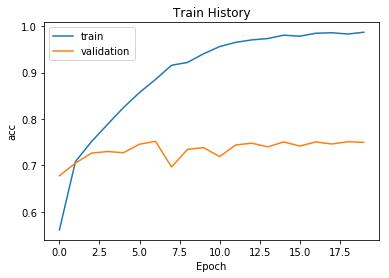

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):   # train:訓練資料執行結果 
    plt.plot(hist.history[train])  # train_history:之前訓練過程產生的資料
    plt.plot(train_history.history[validation])  # validation:驗證資料的執行結果
    plt.title('Train History') # 顯示圖形的標題
    plt.ylabel(train) # 顯示y軸的標題
    plt.xlabel('Epoch') # 設定x軸標籤是'Epoch'
    plt.legend(['train', 'validation'], loc='upper left') # 設定圖例是顯示'train', 'validation'，位置在左上角
    plt.show()
show_train_history(hist,'acc','val_acc')

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict_classes(X_test)
print(y_pred)

p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(二條城)', 'class 1(三十三間堂)', 'class 2(千本鳥居)','class 3(平等院鳳凰堂)','class 4(京都御所)','class 5(京都塔)','class 6(金閣寺)','class 7(清水寺)','class 8(渡月橋)']
# print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

2272/2279 [============================>.] - ETA: 0s[[  0  14   4   0   0   3   3   0   0]
 [  1 173   3   2   0  13  18   0   2]
 [  0  24 399  59   4  15   5   0   2]
 [  0   4  14 364  10   1   4   0   0]
 [  0   1   5  44   0   1   2   0   0]
 [  0  14   4  25   0 316  12   1   2]
 [  0   7  20   7   0  26 307  22  20]
 [  1   2   1   1   0   2  30  40  24]
 [  0   3   1   0   0   5  43  40 109]]
